# Exploratory data analysis and Clean the Data

In [1]:
# packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# loading the data and droping possible duplicates
data = pd.read_csv('job_data.csv')

In [5]:
data.shape

(1000, 10)

In [6]:
data.head()

,Date,Company,Job Title,Location,Description,Seniority,Type,Job Function,Industry,Link
0,2023-07-13,McKinney,Data Analyst,"Phoenix, AZ",Job Responsibilities\r\n\r\n\r\n\r\n\r\nThe Da...,Entry level,Full-time,Information Technology,"Technology, Information and Internet",https://www.linkedin.com/jobs/view/data-analys...
1,2023-07-18,January Digital,Data Analyst,"New York, NY",About January Digital\r\n\r\n\r\n\r\n\r\nJanua...,Entry level,Full-time,Information Technology,"Technology, Information and Internet",https://www.linkedin.com/jobs/view/data-analys...
2,2023-07-20,Holovis,Data Analyst,"Orlando, FL","Role Purpose\r\n\r\nDesign, develop, and imple...",Associate,Full-time,Information Technology,Entertainment Providers,https://www.linkedin.com/jobs/view/data-analys...
3,2023-07-18,Pura,Data Analyst,"Pleasant Grove, UT","Pura, based in Pleasant Grove, UT, has been re...",Mid-Senior level,Full-time,Information Technology,Internet Publishing,https://www.linkedin.com/jobs/view/data-analys...
4,2023-07-28,Tablet Hotels,Data Analyst,"New York, United States",Tablet is how you book the world’s most exciti...,Entry level,Full-time,Information Technology,"Technology, Information and Internet",https://www.linkedin.com/jobs/view/data-analys...


## Check for Null Values and Duplicates

In [7]:
data.isnull().sum()

Date            0
Company         0
Job Title       0
Location        0
Description     0
Seniority       0
Type            0
Job Function    0
Industry        0
Link            0
dtype: int64

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.shape

(1000, 10)

## Selecting the columns needed for analysis

The columns needed are: Date, Job Title, Location, Description and Seniority	

In [10]:
# selecting only the columns of interest
columns = ['Date', 'Job Title', 'Location', 'Description', 'Seniority']
data = data[columns]

In [11]:
data.head()

,Date,Job Title,Location,Description,Seniority
0,2023-07-13,Data Analyst,"Phoenix, AZ",Job Responsibilities\r\n\r\n\r\n\r\n\r\nThe Da...,Entry level
1,2023-07-18,Data Analyst,"New York, NY",About January Digital\r\n\r\n\r\n\r\n\r\nJanua...,Entry level
2,2023-07-20,Data Analyst,"Orlando, FL","Role Purpose\r\n\r\nDesign, develop, and imple...",Associate
3,2023-07-18,Data Analyst,"Pleasant Grove, UT","Pura, based in Pleasant Grove, UT, has been re...",Mid-Senior level
4,2023-07-28,Data Analyst,"New York, United States",Tablet is how you book the world’s most exciti...,Entry level


In [12]:
# null values for each column
data.isnull().sum()

Date           0
Job Title      0
Location       0
Description    0
Seniority      0
dtype: int64

## Cleaning the "Date" column

In [13]:
data['Date'].dtype

dtype('O')

In [14]:
# converting the column "Date" to datetime
data['Date'] = pd.to_datetime(data['Date'])

In [15]:
data['Date'].dtype

dtype('<M8[ns]')

In [16]:
# check the range of dates
data['Date'].value_counts().sort_index()

Date
2023-01-16      1
2023-02-10      1
2023-03-09      1
2023-04-24      1
2023-04-26      1
2023-06-06      2
2023-06-15      1
2023-06-28      2
2023-07-06      1
2023-07-07     10
2023-07-08      5
2023-07-09      4
2023-07-10     21
2023-07-11     52
2023-07-12     32
2023-07-13     17
2023-07-14     33
2023-07-15     13
2023-07-16      8
2023-07-17     49
2023-07-18     46
2023-07-19     27
2023-07-20     73
2023-07-21     44
2023-07-22     26
2023-07-23      6
2023-07-24     41
2023-07-25     72
2023-07-26     58
2023-07-27     66
2023-07-28     54
2023-07-29     32
2023-07-30      9
2023-07-31     45
2023-08-01     14
2023-08-02      5
2023-08-03      8
2023-08-04     18
2023-08-05    101
Name: count, dtype: int64

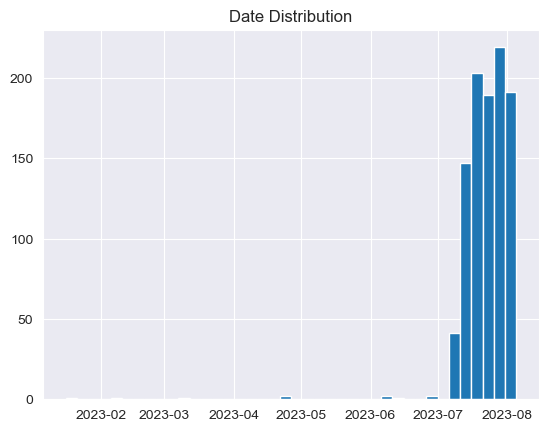

In [17]:
sns.set_style('darkgrid')
plt.hist(data['Date'], bins=40)
plt.title('Date Distribution')
plt.show()

As we can see, most job opportunities are between 2023-07 and 2023-08.

In [18]:
# caculating the date range
data['Date'].max() - data['Date'].min()

Timedelta('201 days 00:00:00')

## Cleaning the "Job Title"

During the search for Data Analyst positions some other positions may appear in the dataset, such as "Data Engineer" and "Data Scientist". We will remove jobs that do not represent "Data Analyst".

In [19]:
data['Job Title'].value_counts()

Job Title
Data Analyst                                               228
Senior Data Analyst                                         41
Sr. Data Analyst, Data Analytics                            24
Business Data Analyst                                       23
Business Intelligence Analyst                               16
                                                          ... 
ITSM Data Analyst-Principals ONLY                            1
Criminology Data Analyst (Electronic Monitoring)             1
Data Management Analyst (BI Developer)                       1
PowerBI System Data Analyst (Systems Analyst) || Remote      1
DATA SPECIALIST, FORECASTING                                 1
Name: count, Length: 491, dtype: int64

In [20]:
# keywords list of job titles that interest you
list_jobs = ['data analyst']

# selecting only job opportunities with titles containing the keywords
bool_mask = data['Job Title'].str.contains('|'.join(list_jobs), case=False)
data = data[bool_mask]
data.reset_index(drop=True, inplace=True)

In [21]:
data['Job Title'].value_counts()

Job Title
Data Analyst                                        228
Senior Data Analyst                                  41
Sr. Data Analyst, Data Analytics                     24
Business Data Analyst                                23
Sr. Data Analyst                                     12
                                                   ... 
Entry Level Business Analyst/Data Analyst             1
Aircraft Data Analyst                                 1
Sr./ Jr. Tableau Developer/Data Analyst _ Remote      1
Data Analyst - Limited Duration                       1
Market Data Analyst                                   1
Name: count, Length: 332, dtype: int64

## Cleaning the "Location" column

In [22]:
data['Location'].value_counts()

Location
United States                         46
New York, NY                          26
Washington, DC                        17
San Francisco, CA                     17
Charlotte, NC                         15
                                      ..
Bingham Farms, MI                      1
Greater Pittsburgh Region              1
Denver, CO                             1
Cuautitlán Izcalli, México, Mexico     1
Lincoln, NE                            1
Name: count, Length: 345, dtype: int64

Our analysis will address opportunities by state in USA. We will exclude entries whose locale is Canada and México.

In [23]:
bool_mask_1 = data['Location'].str.contains('Canada') == False
bool_mask_2 = data['Location'].str.contains('México') == False
bool_mask_3 = data['Location'].str.contains('Mexico City') == False

bool_mask = bool_mask_1 & bool_mask_2 & bool_mask_3
data = data[bool_mask]

In [24]:
# filtering entries in the Location column that have the state abbreviation at the end of the string
match = '[A-Z]{2}'
bool_mask = data['Location'].str.contains(match)
data.loc[bool_mask, 'Location'].value_counts()

Location
New York, NY         26
Washington, DC       17
San Francisco, CA    17
Charlotte, NC        15
Indianapolis, IN     14
                     ..
Time, IL              1
Bonnie View, UT       1
Commerce, CA          1
Everett, WA           1
Lincoln, NE           1
Name: count, Length: 273, dtype: int64

In [25]:
# Extracting only the acronyms at the end of each string
data.loc[bool_mask, 'Location'] = data.copy().loc[bool_mask, 'Location'].apply(lambda x: x[-2:])

In [26]:
# take a look in the unique values
data['Location'].value_counts()

Location
CA                           101
NY                            50
TX                            47
United States                 46
VA                            45
                            ... 
LA                             1
Texas, United States           1
Vermont, United States         1
SC                             1
Torreon Metropolitan Area      1
Name: count, Length: 88, dtype: int64

In [27]:
# Replacing the other entries in the Location column with acronyms
cities_states = {
    'United States':'Unknown',
    'California, United States':'CA',
    'New York, United States':'NY',
    'Virginia, United States':'VA',
    'Washington, United States':'WA',
    'New Jersey, United States':'NJ',
    'Rhode Island, United States':'RI',
    'Vermont, United States':'VT',
    'Pennsylvania, United States':'PA',
    'South Carolina, United States':'SC',
    'Maryland, United States':'MD',
    'Denver Metropolitan Area':'CO',
    'Alabama, United States':'AL',
    'Oklahoma City Metropolitan Area':'OK',
    'Oklahoma, United States':'OK',
    'Iowa, United States':'IA',
    'Illinois, United States':'IL',
    'West Virginia, United States':'WV',
    'Kansas, United States':'KS',
    'Kentucky, United States':'KY',
    'Nebraska, United States':'NE',
    'Dallas-Fort Worth Metroplex':'TX',
    'Texas, United States':'TX',
    'Georgia, United States':'GA',
    'San Diego Metropolitan Area':'CA',
    'Connecticut, United States':'CT',
    'Los Angeles Metropolitan Area':'CA',
    'Greater Minneapolis-St. Paul Area':'MN',
    'Michigan, United States':'MI',
    'Greater Houston':'TX',
    'District of Columbia, United States':'WA',
    'Greater Chicago Area':'IL',
    'Louisville Metropolitan Area':'KY',
    'Greater Pittsburgh Region':'PA'
}

data['Location'] = data['Location'].replace(cities_states)

In [28]:
data['Location'].value_counts().tail(60)

Location
CA                                       108
NY                                        54
TX                                        50
VA                                        48
Unknown                                   46
FL                                        34
PA                                        28
GA                                        26
NJ                                        24
IL                                        24
MA                                        24
NC                                        21
IN                                        20
MD                                        19
OH                                        18
DC                                        17
WA                                        15
CO                                        14
AZ                                        14
MI                                         9
MO                                         8
MN                                         8
O

In [29]:
bool_mask_1 = data['Location'].str.contains('Mexico') == False
bool_mask_2 = data['Location'].str.contains('Area') == False

bool_mask = bool_mask_1 & bool_mask_2
data = data[bool_mask]

In [30]:
# eliminating entries with unknown location
data = data[data['Location'] != 'Unknown']
data.reset_index(drop=True, inplace=True)

Now the column is ok.

## Cleaning the "Seniority" column

In [31]:
data['Seniority'].value_counts()

Seniority
Entry level         364
Mid-Senior level    250
Not Applicable       22
Associate            19
Internship            1
Name: count, dtype: int64

The column is ok.

## Finding the technologies

In [32]:
# tecnologias
tec = [
    'Azure',
    '[\s|\,|\.\;]excel[\s|\,|\.\;]',
    '[\s|\,|\.\;]git[\s|\,|\.\;]',
    'Google[\s]{0,1}Sheets',
    'power[\s]{0,1}bi',
    'Python',
    '[\s|\,|\.\;]r[\s|\,|\.\;]',
    '[\s|\,|\.\;]sas[\s|\,|\.\;]',
    'NoSQL',
    '(?<!No)SQL',
    'Tableau' 
]

# adding new columns to the dataset informing if the technologies occur (1 = contains and 0 = does not contain)
for name in tec:
    data[name] = data['Description'].str.contains(name, case=False, regex=True).astype(int)
    
data.rename(columns={
    'power[\s]{0,1}bi':'Power Bi',
    '[\s|\,|\.\;]git[\s|\,|\.\;]':'Git',
    '[\s|\,|\.\;]excel[\s|\,|\.\;]':'Excel',
    '[\s|\,|\.\;]sas[\s|\,|\.\;]':'Sas',
    '[\s|\,|\.\;]r[\s|\,|\.\;]':'R',
    'Google[\s]{0,1}Sheets' : 'Google Sheets',
    '(?<!No)SQL' : 'SQL'
}, inplace=True)

In [33]:
# adding an index column to the dataset
data['Index'] = range(len(data))
data['Index'] = data['Index'].astype(str)

# putting the index column in the first position
cols = data.columns.tolist()
cols = cols[-1:] + cols[:-1]
data = data[cols]

In [34]:
data.head()

,Index,Date,Job Title,Location,Description,Seniority,Azure,Excel,Git,Google Sheets,Power Bi,Python,R,Sas,NoSQL,SQL,Tableau
0,0,2023-07-13,Data Analyst,AZ,Job Responsibilities\r\n\r\n\r\n\r\n\r\nThe Da...,Entry level,0,1,0,1,0,1,0,0,0,1,1
1,1,2023-07-18,Data Analyst,NY,About January Digital\r\n\r\n\r\n\r\n\r\nJanua...,Entry level,0,0,0,0,0,1,0,0,0,1,1
2,2,2023-07-20,Data Analyst,FL,"Role Purpose\r\n\r\nDesign, develop, and imple...",Associate,1,0,0,0,1,0,0,0,0,1,0
3,3,2023-07-18,Data Analyst,UT,"Pura, based in Pleasant Grove, UT, has been re...",Mid-Senior level,0,0,0,0,0,0,0,0,0,1,1
4,4,2023-07-28,Data Analyst,NY,Tablet is how you book the world’s most exciti...,Entry level,0,1,0,0,0,1,1,0,0,1,1


## Output the data

In [35]:
# output the data
data.to_csv('job_data_cleaned.csv', index=False)

In [36]:
data.columns

Index(['Index', 'Date', 'Job Title', 'Location', 'Description', 'Seniority',
       'Azure', 'Excel', 'Git', 'Google Sheets', 'Power Bi', 'Python', 'R',
       'Sas', 'NoSQL', 'SQL', 'Tableau'],
      dtype='object')

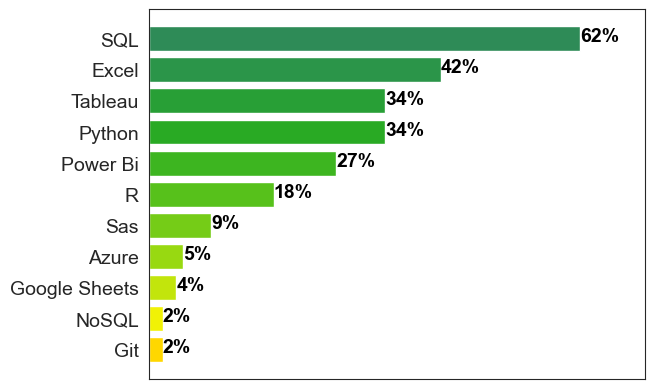

In [37]:
# This cell is dedicated to plot a barchart
import matplotlib.pyplot as plt
import matplotlib as mp
import numpy as np
import seaborn as sns
from colour import Color

# dictionary of total appearances of terms Azure, Excel, Git, Google Sheets, Power Bi, Python, Linguagem R, 
# Sas, NoSQL, SQL, and Tableau
tec = ['Azure', 'Excel', 'Git', 'Google Sheets', 'Power Bi', 'Python', 'R', 'Sas', 'NoSQL', 'SQL', 'Tableau']
values = [round(data[item].sum()*100/ data.shape[0]) for item in tec]
list_occurrences = dict(zip(tec, values))

# reverse sort dictionary entries by values
list_occurrences = dict(sorted(list_occurrences.items(), key=lambda item: item[1], reverse=False))

# rewriting the ordered tec and list_aparicoes lists
tec = list(list_occurrences.keys())
values = list(list_occurrences.values())

# style
sns.set_style('white')


# element positions on the y axis
y_pos = np.arange(len(tec))

# setting the margins
plt.margins(x=0.15)
# plt.subplots_adjust(top=1.55)

# bar colors
red = Color("gold")
colors = list(red.range_to(Color("seagreen"), len(tec)))
colors = [color.rgb for color in colors]


# creating the horizontal bars
plt.barh(y_pos, values, color=colors)

# assigning the names in the y axis
plt.yticks(y_pos, tec, size = 14)

# remove xticks
plt.tick_params(labelleft=True, labelbottom=False)

# percent at the end of each bar
for i in range(len(values)):
    plt.text(x = values[i] , y = y_pos[i]-0.1, s=str(values[i])+'%', size = 14, color='black', fontweight='bold')

plt.show()